# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

## Step1. 下載資料

In [78]:
# 載入乳癌資料集
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print(breast_cancer.target_names)
# 選擇兩個特徵進行視覺化
selected_features = [0, 1]
X_selected = X[:, selected_features]

['malignant' 'benign']


## Step2. 區分訓練集與測試集

In [74]:
# 切分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Step3. 建模

In [75]:
# 建立 SVC 分類器
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

SVC()

## Step4. 預測

```

```


In [76]:
y_pred = clf.predict(X_test)

## Step5. 準確度分析

0.9076923076923077
0.9210526315789473


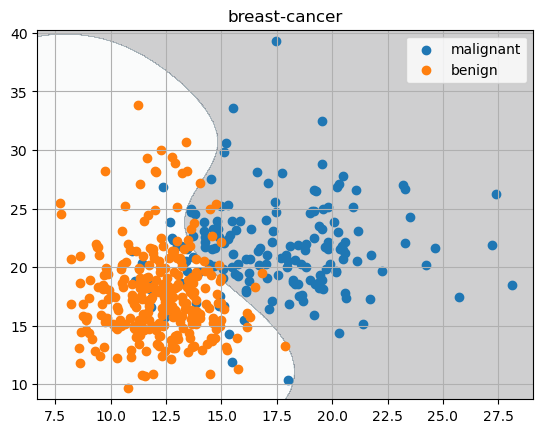

In [81]:
# 計算準確度
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

# 繪製 SVM 決策邊界
SVM_plot(clf, X_train, y_train, 'breast-cancer')

In [80]:
def SVM_plot(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    grid_interval = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_interval), np.arange(y_min, y_max, grid_interval))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.2)
    plt.autoscale()
    plt.grid()
    
    unique_classes = np.unique(y)
    for cls in unique_classes:
        class_data = X[y == cls]
        class_label = 'malignant' if cls == 0 else 'benign'
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f'{class_label}')

    plt.title(title)
    plt.legend()
    plt.show()
